In [85]:
import os
import glob
import csv

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')


In [86]:
data_2 = pd.read_csv('../output/train_outputs.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()


,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_63,Subcar_64,Label
0,1625554196,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592,0
1,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592,0
2,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592,0
3,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592,0
4,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592,0


In [87]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:,-1]


In [88]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X_data, target, test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_valid.shape: ', x_valid.shape)


X_train.shape:  (876, 64)
X_valid.shape:  (219, 64)


In [89]:
# Scaling
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(X_data)
# data_scaled
# print(data_scaled)
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)


[[-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 ...
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]
 [ 2.33773395e+01  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]]


In [90]:
x_test_scaled = standardizer.transform(x_valid)
x_test_scaled


array([[-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       ...,
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [ 2.33773395e+01,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00]])

In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, kernel_regularizer='l2', dtype='float32'),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dense(256, kernel_regularizer='l2', dtype='float32'),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dense(256, kernel_regularizer='l2', dtype='float32'),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid', dtype='float64')
])


In [92]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


In [93]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=10)


Epoch 1/20
88/88 [==============================] - 0s 4ms/step - loss: 278.9223 - accuracy: 0.6336 - precision: 0.3834 - recall: 0.3702 - val_loss: 20.1490 - val_accuracy: 0.6575 - val_precision: 0.6575 - val_recall: 1.0000
Epoch 2/20
88/88 [==============================] - 0s 1ms/step - loss: 26.5298 - accuracy: 0.6495 - precision: 0.4170 - recall: 0.4313 - val_loss: 22.2666 - val_accuracy: 0.3653 - val_precision: 0.5556 - val_recall: 0.1736
Epoch 3/20
88/88 [==============================] - 0s 1ms/step - loss: 22.5381 - accuracy: 0.6358 - precision: 0.3891 - recall: 0.3817 - val_loss: 15.5581 - val_accuracy: 0.6575 - val_precision: 0.6575 - val_recall: 1.0000
Epoch 4/20
88/88 [==============================] - 0s 1ms/step - loss: 22.3105 - accuracy: 0.6575 - precision: 0.4312 - recall: 0.4542 - val_loss: 67.1124 - val_accuracy: 0.3425 - val_precision: 0.5000 - val_recall: 0.0278
Epoch 5/20
88/88 [==============================] - 0s 1ms/step - loss: 15.4810 - accuracy: 0.6747 - pr

In [94]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [95]:
def vis(history, name):
    plt.title(f"{name.upper()}", fontsize=13)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel(f"{name.lower()}", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}", None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None:
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.05, 1.2), fontsize=16, ncol=1)


def plot_history(history):
    key_value = list(set([i.split("val_")[-1]
                     for i in list(history.history.keys())]))
    plt.figure(figsize=(20, 8))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

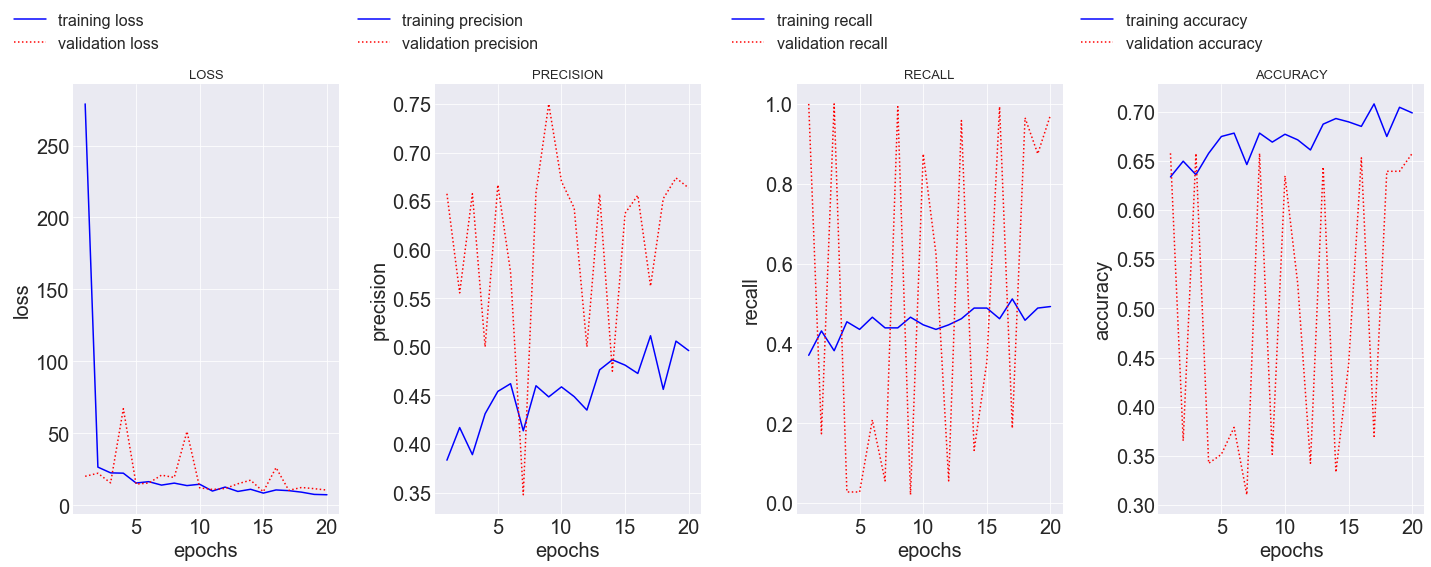

In [96]:
plot_history(history)

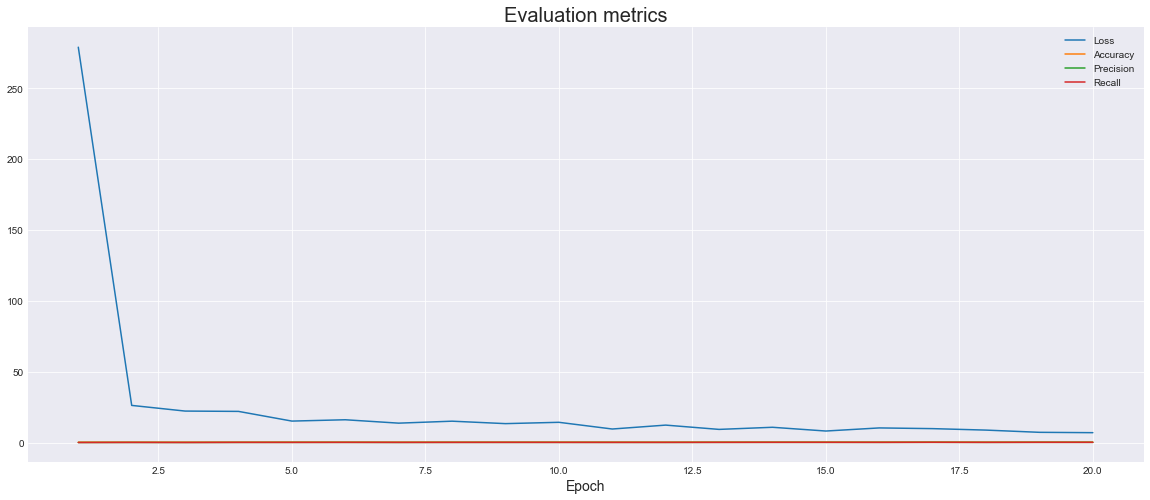

In [97]:
plt.plot(
    np.arange(1, 21),
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 21),
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 21),
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 21),
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()


In [98]:
predictions = model.predict(x_test_scaled)


In [99]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]


In [100]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_valid, prediction_classes))


[[ 16  59]
 [ 16 128]]


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_valid, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_valid, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_valid, prediction_classes):.2f}')


Accuracy: 0.66
Precision: 0.68
Recall: 0.89


In [102]:
x_train = x_train.values.reshape(876,64, 1)
x_valid = x_valid.values.reshape(219,64, 1)
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_valid.shape)

X_train.shape:  (876, 64, 1)
X_test.shape:  (219, 64, 1)


In [103]:
# Set up parameters
n_steps = 64
n_features = 1
epochs = 20

# Create a traditional RNN network
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape=(n_steps, n_features),kernel_regularizer='l2',  return_sequences=True,))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dense(32, kernel_regularizer='l2', dtype='float32'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', dtype='float32'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64, 64)            16896     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 64, 64)            0         
_________________________________________________________________
dense_24 (Dense)             (None, 64, 32)            2080      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 64, 32)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 64, 1)             33        
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='mse', metrics=['accuracy'])


In [105]:
model_RNN = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=10)


Epoch 1/20
88/88 [==============================] - 2s 18ms/step - loss: 0.5084 - accuracy: 0.6893 - val_loss: 0.5214 - val_accuracy: 0.3425
Epoch 2/20
88/88 [==============================] - 1s 13ms/step - loss: 0.3204 - accuracy: 0.7009 - val_loss: 0.4164 - val_accuracy: 0.3425
Epoch 3/20
88/88 [==============================] - 1s 13ms/step - loss: 0.2561 - accuracy: 0.7009 - val_loss: 0.3582 - val_accuracy: 0.3425
Epoch 4/20
88/88 [==============================] - 1s 13ms/step - loss: 0.2327 - accuracy: 0.7009 - val_loss: 0.3443 - val_accuracy: 0.3425
Epoch 5/20
88/88 [==============================] - 1s 13ms/step - loss: 0.2238 - accuracy: 0.7009 - val_loss: 0.3928 - val_accuracy: 0.3425
Epoch 6/20
88/88 [==============================] - 1s 13ms/step - loss: 0.2197 - accuracy: 0.7009 - val_loss: 0.3513 - val_accuracy: 0.3425
Epoch 7/20
88/88 [==============================] - 1s 13ms/step - loss: 0.2161 - accuracy: 0.7009 - val_loss: 0.3563 - val_accuracy: 0.3425
Epoch 8/20
88

In [106]:
model_RNN.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [107]:
(loss, accuracy) = model.evaluate(x_valid, y_valid, verbose=1)

7/7 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.3425


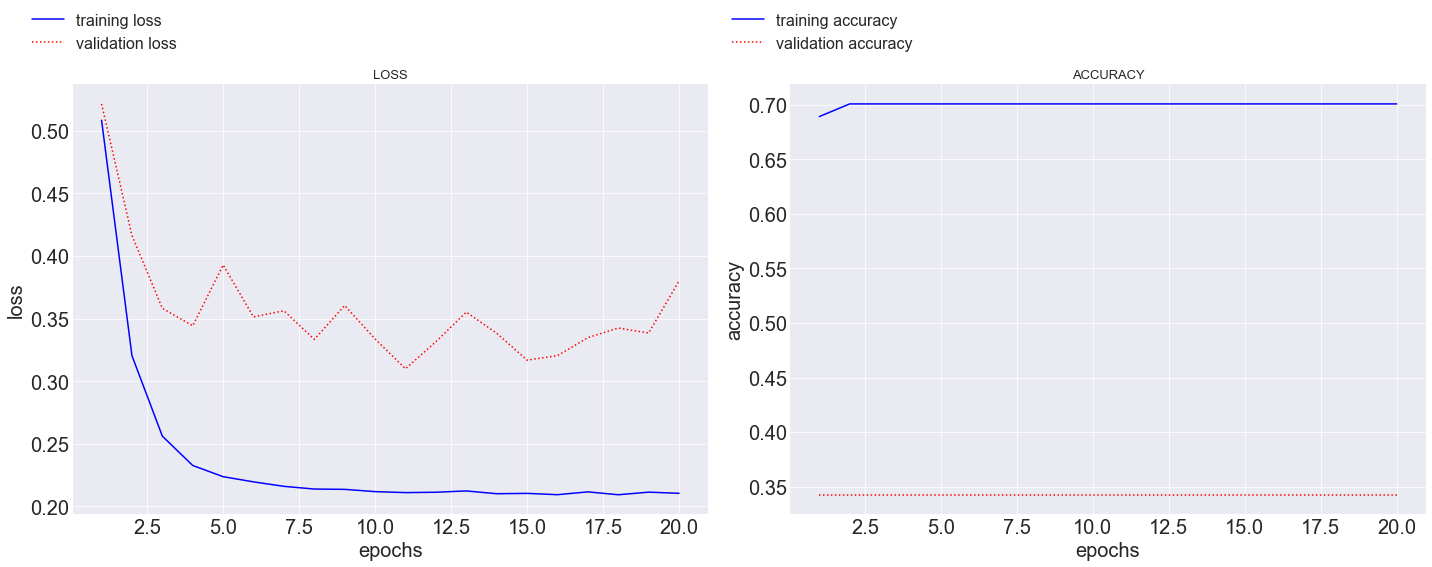

In [108]:
plot_history(model_RNN)
    